In [2]:
# Como a biblioteca rasteio não é tão comumente utilizada, é necessária a sua instalação com o comando
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 1.9 MB/s eta 0:00:00


In [3]:
# Bibliotecas utilizadas
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import rasterio
from rasterio.plot import show
from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

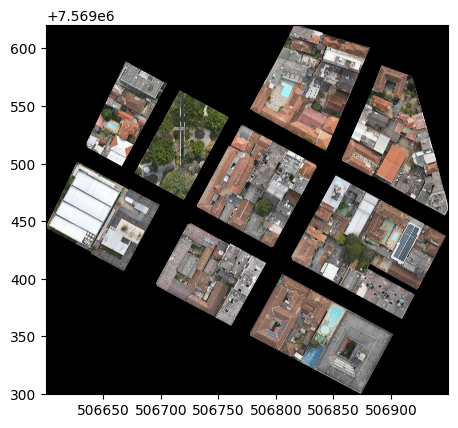

<Axes: >

In [4]:
# Carrega a foto através do link
ortofoto = rasterio.open("https://raw.githubusercontent.com/MeAnnaLuiza/Projeto-Redes/master/imagem_recortada.jpg")
show(ortofoto)

In [5]:
# Ajustando o formato dos dados
bandas = np.zeros((ortofoto.height, ortofoto.width, ortofoto.count), np.uint8)

for b in range(ortofoto.count):
    bandas[:, :, b] = ortofoto.read(b+1)

bandas.shape

novo_shape = (bandas.shape[0] * bandas.shape[1], bandas.shape[2])

X = bandas[:, :, :ortofoto.count].reshape(novo_shape)
X.shape

(62447630, 3)

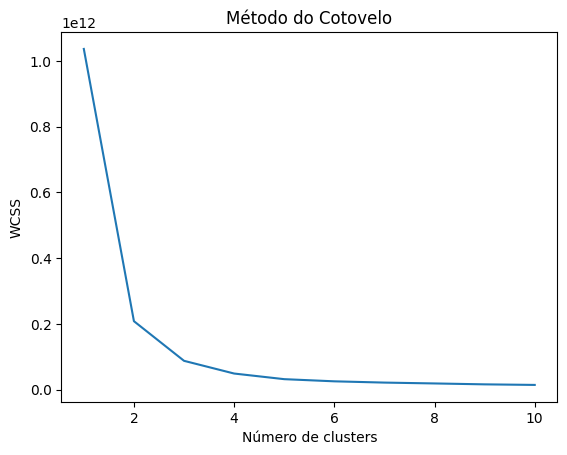

In [6]:
# Calculando WCSS para diferentes números de clusters
wcss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, n_init='auto', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [7]:
# Definição de quantos grupos serão gerados
k = input("Quantidade de grupos a serem gerados: ")

Quantidade de grupos a serem gerados: 4


In [8]:
# Treina o modelo
modelo_raster_bandas = MiniBatchKMeans(n_clusters=int(k), random_state=42, n_init='auto')
modelo_raster_bandas.fit(X)

X_cluster_bandas = modelo_raster_bandas.labels_
X_cluster_bandas = X_cluster_bandas.reshape(bandas[:, :, 0].shape)

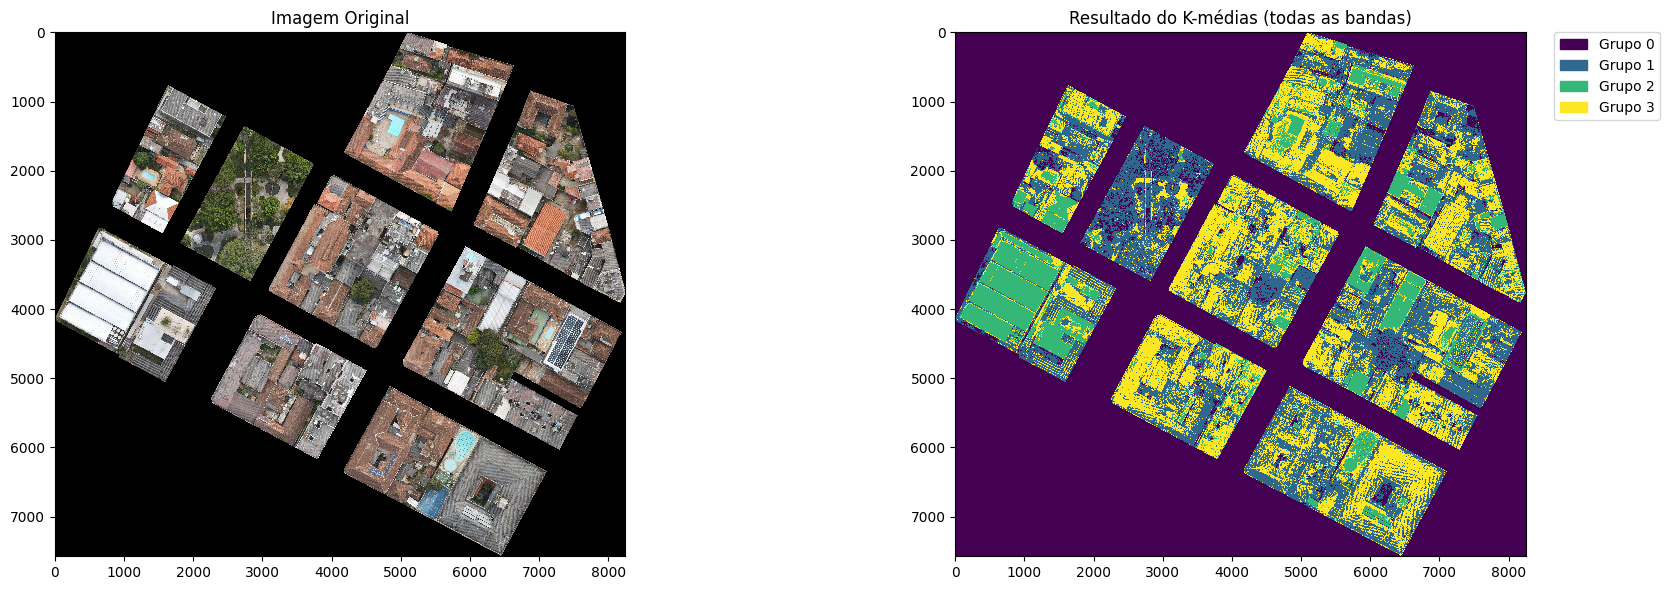

In [9]:
# Configuração da figura e dos subplots
plt.figure(figsize=(20,6))

# Subplot para a imagem original
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, 1ª posição
plt.imshow(np.transpose(ortofoto.read(), (1, 2, 0)), interpolation='none')  # Sem especificar cmap, pois é RGB
plt.title('Imagem Original')

# Subplot para a imagem após o K-médias
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, 2ª posição
im = plt.imshow(X_cluster_bandas, cmap="viridis", interpolation='none')
plt.title('Resultado do K-médias (todas as bandas)')

# Ajustes para a legenda
values = np.unique(X_cluster_bandas.ravel())
colors = [im.cmap(im.norm(value)) for value in values]
patches = [mpatches.Patch(color=colors[i], label="Grupo {l}".format(l=values[i])) for i in range(len(values))]
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()  # Ajusta o layout
plt.show()